# Takeaways
* **Extract the add_lags functionality and use everywhere**
* **Extract the train_test_model and use it to test strats**
* Use np.sign and accuracy for hit rate
* Use np.stack to flatten out all the values in a DataFrame
* Do lags on time series data iteratively, add_lags is a great function below
* OLS does not predict returns well
* Neither do neural nets out of sample - feature engineering is key
* **Momentum is just the mean of returns**
* Any feature you can think of can be used as the input to a perceptron/neural net
* Online Learning architectures best for finance
* Classification (discrete) vs. Estimation (continuous)
* Policies: for observed state space x, take action y
* TODO: Find intraday sources to run this on as well as more signals (volume, autocorrelation, autocorrelation decay) - also try it on the Open instead of the close?
* `np.random.randint(0, 2, (samples, features))` for on/off bit initialization
* *layer_two = sigmoid(np.dot(layer_zero, weights))*
* `layer_two.round() # THIS IS HOW CLASSIFICATION WORKS - EACH CLASS IS GIVEN AN INTEGER VALUE`

# Introduction
* A function that captures all available data and outputs the optimal stocks to buy with minimal information loss would make you extremely rich.
* Covering Ordinary Least Squares, Neural Nets to seek inefficiences, effectiveness of an AI first approach.

# Linear Regression Model Attributes
* **Linearity** model coefficients and error are linear
* **Indepence** variables not perfectly correlated
* **Zero Mean** mean of residuals should be zero
* **No Correlation** residuals should not be correlated with variables
* **Homescedasticity** standard deviation of variables should be constant
* **No Autocorrelation** Residuals should not be correlated with each other

# Neural Network Architecture Attribrutes
* Inputs!
* Outputs!
* Hidden Layers: which only meants **they are not inputs nor outputs**
* Weight between these!
* That's it!

# Tensor Definitions
* Tensor: A 0 (scalar), 1 ( vector), 2 (matrix), or N (hyperspace)-dimensional array of data
* **Tensor Operations**: Broadcasting (match rank between tensors of different size), dot product, element-wise multiplication/subtraction/addition, reshapes
* **Neural Network**: A collection of objects *(tensors and tensor operations connecting them)* consisting of Inputs, Outputs, and 0 to N hidden layers.
* **Weights**: Tensors flowing data from one layer to the next

In [81]:
t0 = np.array(10) # Scalar Tensor 0d
t1 = np.array((2, 1)) # Vector Tensor 1D
t2 = np.arange(10).reshape((2, 5)) # Matrix Tensor 2d
print(t2 + t2) # Element wise
print(t1 + t0) # Broadcasting
np.dot(t2.T, t1) # Dot Product, transposed for shape matching

[[ 0  2  4  6  8]
 [10 12 14 16 18]]
[12 11]


array([ 5,  8, 11, 14, 17])

# Simplest Neural Net
* One input layer
* One weights layer
* One output layer

In [108]:
# Basical Neural Net architecture
features = 2
samples = 5
input_arr = np.random.random((samples, features))
weights = np.random.random((features, 1)) # 1 weight per feature
output = np.dot(input_arr, weights)
output # Scores for each  feature

array([[0.53399673],
       [0.66676769],
       [0.20900039],
       [0.21952084],
       [0.51139242]])

# Introducing Hidden Layers
* Introduce a first hidden layer with 3 units

In [109]:
units = 3

In [110]:
w0 = np.random.random((features, units)) # 2 features x 3 units
w0 

array([[0.57744137, 0.44170782, 0.3596781 ],
       [0.32133193, 0.20820724, 0.45125862]])

In [111]:
hidden_output_one =  np.dot(input_arr, w0)  # First hidden layer
hidden_output_one

array([[0.62222163, 0.46686993, 0.4483036 ],
       [0.76406295, 0.56255727, 0.62223967],
       [0.23013866, 0.16149979, 0.24048878],
       [0.24151908, 0.16930571, 0.25358522],
       [0.57365487, 0.41187325, 0.53725905]])

In [112]:
hidden_layer_two = np.random.random((units, 1))
hidden_layer_two

array([[0.49184291],
       [0.89907631],
       [0.72936046]])

In [113]:
output_layer = np.dot(hidden_output_one, hidden_layer_two)
output_layer

array([[1.05276192],
       [1.33541787],
       [0.43379571],
       [0.45596323],
       [1.04430907]])

# Learning
* Adjust the weights to reduce **the loss function**. The loss is **the difference between the predicted values and the actual values**. 
* **Less loss is better**
* **Gradient** - the derivative of a tensor operation
* **Backward Propogation**: A method of adjusting the weights from the boss function based on chaining gradients
* **Optimizer** a method based on backprop to optimize net weights

In [115]:
input_arr # 5 X 2

array([[0.94296024, 0.24186009],
       [0.99893227, 0.58269382],
       [0.183279  , 0.38684542],
       [0.18967353, 0.41077067],
       [0.59468007, 0.71658609]])

In [116]:
weights = np.random.random((features, 1))
weights

array([[0.77008977],
       [0.37543925]])

In [118]:
output_layer = np.dot(input_arr, weights)
output_layer

array([[0.81696781],
       [0.98803365],
       [0.28637824],
       [0.30028508],
       [0.72699158]])

In [124]:
y = input_arr[:, 0] * 0.5 + input_arr[:, 1] # Labels (target output)
y = y.reshape(-1, 1)
y

array([[0.71334021],
       [1.08215995],
       [0.47848492],
       [0.50560744],
       [1.01392613]])

In [125]:
errors = output_layer - y # Errors is just difference between the two in vector space
errors

array([[ 0.1036276 ],
       [-0.0941263 ],
       [-0.19210668],
       [-0.20532236],
       [-0.28693454]])

In [126]:
mean_square_error = (errors ** 2).mean() # Loss function
mean_square_error

0.036198424473815854

In [138]:
d = errors * output_layer # Update weights

In [139]:
alpha = 0.01 # Learning Rate

In [142]:
u = alpha * np.dot(input_arr.T, d)
u # Difference to subtract from weights

array([[-0.00158896],
       [-0.00229802]])

In [145]:
weights -= u
weights

array([[0.7732677 ],
       [0.38003529]])

In [147]:
output_layer = np.dot(input_arr, weights)
errors = output_layer - y
errors

array([[ 0.10773586],
       [-0.08827368],
       [-0.18974628],
       [-0.20283167],
       [-0.28175123]])

In [148]:
mean_square_error = (errors ** 2).mean() # Loss function
mean_square_error

0.03518547039270288

# Iteration
* These are the basic steps - now repeat this over and over and over again until within a certain error tolerance:
    1. Take the dot product of input and weights
    2. Subtract the output of #1 from the actual values
    3. Multiply (element-wise) the error and the output from #1
    4. Multiply the dot product of 33 and the input by the learning rate ${\alpha}$
    5. Subtract #4 (element-wise) from the weights vector
    6. Repeat 1-5 until the mean square error goes below a threshold or a maximum numbers of steps is reached

In [5]:
steps = 400

In [37]:
# Basical Neural Net architecture
w = np.random.random((features, 1))
features = 2
samples = 5
alpha = 0.025 # Learning Rate
y = input_arr[:, 0] * 0.5 + input_arr[:, 1] # Labels (target output)
y = y.reshape(-1, 1)
input_arr = np.random.random((samples, features))

for s in range(1, steps + 1):
    output_arr = np.dot(input_arr, w)
    error = output_arr - y
    d = error
    u = alpha * np.dot(input_arr.T, d)
    w -= u
    mse = (error ** 2).mean()
    if s % 20 == 0: # Print every twenty steps
        print(f'step:{s:3d} | mse={mse:.5f}')

step: 20 | mse=0.08355
step: 40 | mse=0.05734
step: 60 | mse=0.05213
step: 80 | mse=0.04948
step:100 | mse=0.04762
step:120 | mse=0.04624
step:140 | mse=0.04520
step:160 | mse=0.04444
step:180 | mse=0.04386
step:200 | mse=0.04343
step:220 | mse=0.04311
step:240 | mse=0.04287
step:260 | mse=0.04270
step:280 | mse=0.04256
step:300 | mse=0.04246
step:320 | mse=0.04239
step:340 | mse=0.04233
step:360 | mse=0.04229
step:380 | mse=0.04226
step:400 | mse=0.04224


# Activation and Normalization
* **Activation** is the transformation of values of layers in a network - two popularl functions are **ReLu** ${max(0, x)}$ and **Sigmoid** ${sig(x) = \frac{1}{1 + e^{-x}}}$
* **Transformation** is the transformation of features/labels - two popular normalizations are to the unit interval or to Gaussian (mean zero, std dev one)
* **Sigmoid** transforms all highly negative values to near 0 and all highly positive values to near 1

In [14]:
def sigmoid(x, deriv=False):
    if deriv:
        return sigmoid(x) * (1 - sigmoid(x)) # Rate of change of sigmoid function
    return 1 / (1 + np.exp(-x))

In [48]:
x = np.linspace(-5, 5, 100)

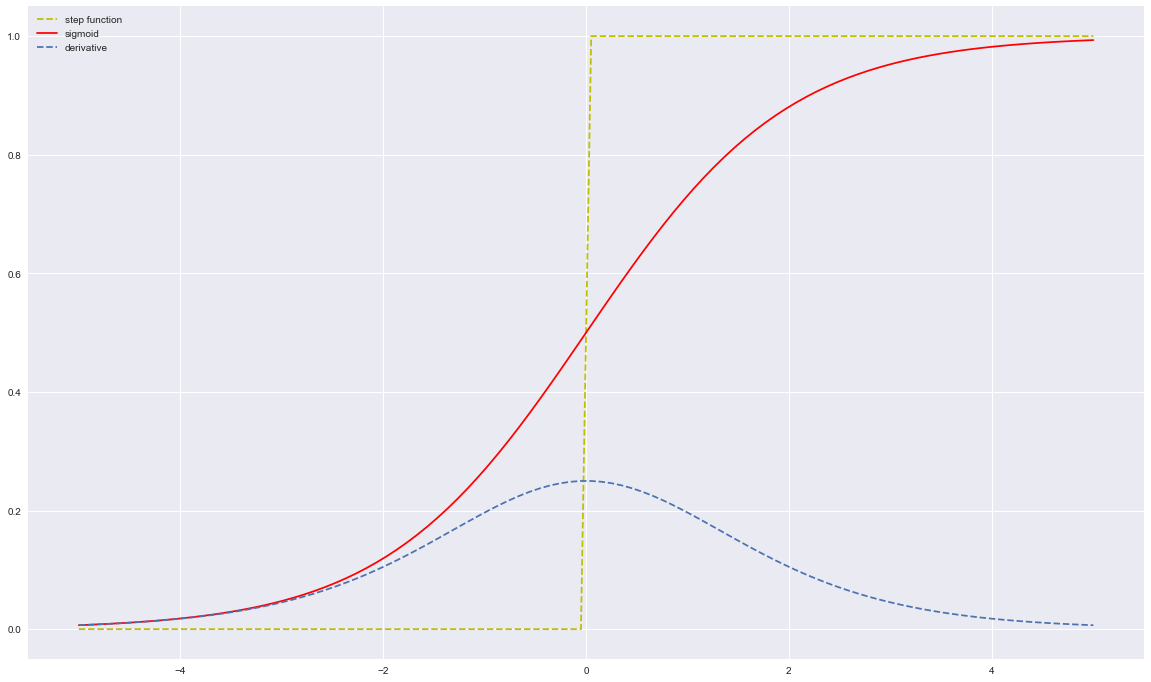

In [49]:
plt.figure(figsize=(20,12))
plt.plot(x, np.where(x > 0, 1, 0), 'y--', label='step function')
plt.plot(x, sigmoid(x), 'r', label='sigmoid')
plt.plot(x, sigmoid(x, True), '--', label='derivative')
plt.legend()

In [3]:
# Classification Neural Net
import numpy as np
features = 3
samples = 4

In [10]:
np.random.seed(1)
layer_zero = np.random.randint(0, 2, (samples, features)) # One or a zero in shape of third argument
layer_zero

array([[1, 1, 0],
       [0, 1, 1],
       [1, 1, 1],
       [0, 0, 1]])

In [12]:
weights = np.random.random((features, 1))
weights

array([[0.18626021],
       [0.34556073],
       [0.39676747]])

In [23]:
# THIS IS HOW CLASSIFICATION WORKS - EACH CLASS IS GIVEN AN INTEGER VALUE
layer_two = sigmoid(np.dot(layer_zero, weights)) 
layer_two.round() # Hypothesis labels

array([[1.],
       [1.],
       [1.],
       [1.]])

In [24]:
y = np.random.randint(0, 2, samples) # True labels
y = y.reshape(-1, 1)
y

array([[1],
       [0],
       [0],
       [1]])

In [25]:
error = layer_two - y
error

array([[-0.37009228],
       [ 0.67750476],
       [ 0.71678882],
       [-0.40208924]])

In [26]:
mean_squared_error = (error**2).mean()
mean_squared_error

0.3178607400251155

# Backward Propogation
* Propogate Errors back through the layers using the gradient of the hidden layer

In [27]:
alpha = 0.02 # Learning Rate
delta = error * sigmoid(layer_two, True) # Propogate the errors to the gradient of the hidden layer

In [30]:
u = alpha * np.dot(layer_zero.T, delta) # Dot of the input and gradient
u

array([[0.00148194],
       [0.00450865],
       [0.00434609]])

In [32]:
weights -= u # Finally, learn the adjusted weights from the gradient
weights

array([[0.18329634],
       [0.33654344],
       [0.3880753 ]])

# Efficient Markets Hypothesis
* **The prices of financial instruments at a given time reflect all information**
* Weak form - The market incorporates all past price and returns information
* Semi-Strong form - The market incorporates all public information (Weather, News, Financial Reports)
* Strong form - the market also incorporates all private information
* If the strong form holds, all technical analysis and quant work is useless
* If we are truly in a random walk, then the best predictor of tomorrow's stock price (in an OLS sense) is today's stock price
* Let's test this! Take daily returns data, give it n number of lags, and use it as a predictor ${x}$ for today's data as ${y}$

In [2]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
pd.set_option('precision', 4)
%matplotlib inline

In [3]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'

In [4]:
data = pd.read_csv(url, index_col=0, parse_dates=True).dropna()
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.5728,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.6257,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.1385,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.0828,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.2828,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


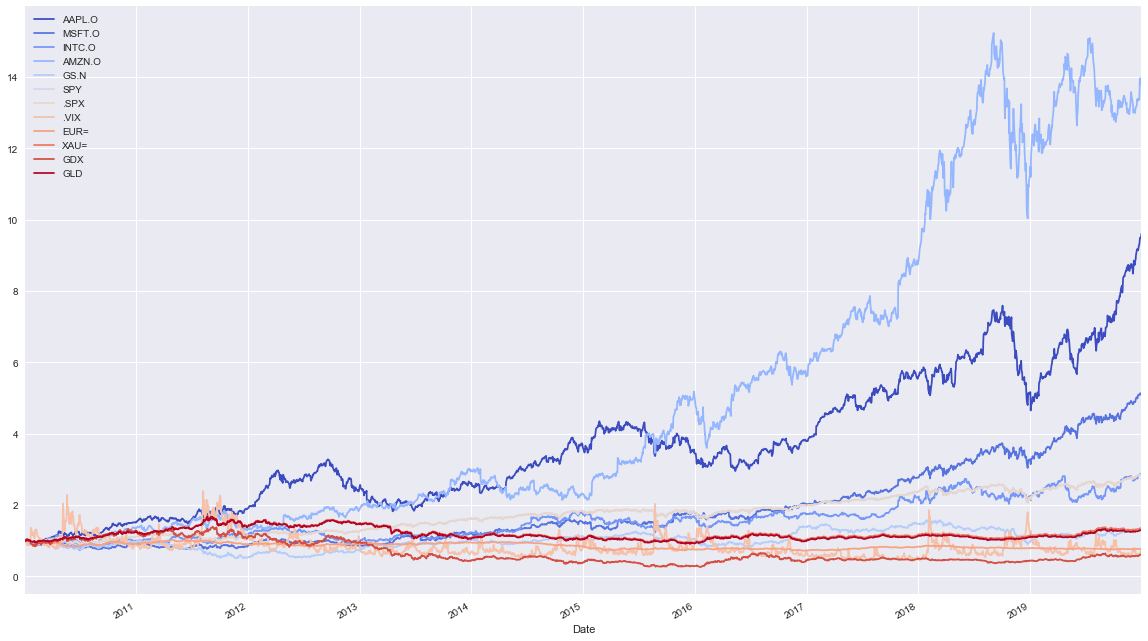

In [4]:
(data / data.iloc[0]).plot(figsize=(20,12), cmap='coolwarm') # that divison is so every security starts from 1

In [5]:
lags = 7
# Lag the time series by n number of days
def add_lags(data, ric, lags):
    cols = []
    df = pd.DataFrame(data[ric])
    for lag in range(1, lags+1):
        col = 'lag_{}'.format(lag) 
        df[col] = data[ric].shift(lag) # Create a lagged version and add it the dataframe
        cols.append(col) # Add the lagged column to a list of lags on its own
    df.dropna(inplace=True)
    return df, cols # Return a tuple of the df with lags and the independent dictionary

In [6]:
dfs = {}
for sym in data.columns:
    df, cols = add_lags(data, sym, lags)
    dfs[sym] = df

# Regression by Lags
* Now let's take this set of lags and fit an OLS regression of degree=lags on the symbol data

In [7]:
regs = {}
for sym in data.columns:
    df = dfs[sym]
    reg = np.linalg.lstsq(df[cols], df[sym], rcond=-1)[0] # Find optimal weights for all lags to minimize L2 norm
    regs[sym] = reg

# Flattening Dataframes to Re-add them
* **Use np.stack on df.values()**

In [8]:
rega = np.stack(tuple(regs.values())) # Combine optimal results into a single ndArray
rega.shape # 12 securities, 7 lags

(12, 7)

In [9]:
regd = pd.DataFrame(rega, columns=cols, index=data.columns)
regd

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
AAPL.O,1.0106,-0.0592,0.0258,0.0535,-0.0172,0.0060,-0.0184
MSFT.O,0.8928,0.0112,0.1175,-0.0832,-0.0258,0.0567,0.0323
INTC.O,0.9519,0.0579,0.0490,-0.0772,-0.0373,0.0449,0.0112
AMZN.O,0.9799,-0.0134,0.0206,0.0007,0.0525,-0.0452,0.0056
GS.N,0.9806,0.0342,-0.0172,0.0042,-0.0387,0.0585,-0.0215
SPY,0.9692,0.0067,0.0228,-0.0244,-0.0237,0.0379,0.0121
.SPX,0.9672,0.0106,0.0219,-0.0252,-0.0318,0.0515,0.0063
.VIX,0.8823,0.0591,-0.0289,0.0284,-0.0256,0.0511,0.0306
EUR=,0.9859,0.0239,-0.0484,0.0508,-0.0217,0.0149,-0.0055
XAU=,0.9864,0.0069,0.0166,-0.0215,0.0044,0.0198,-0.0125


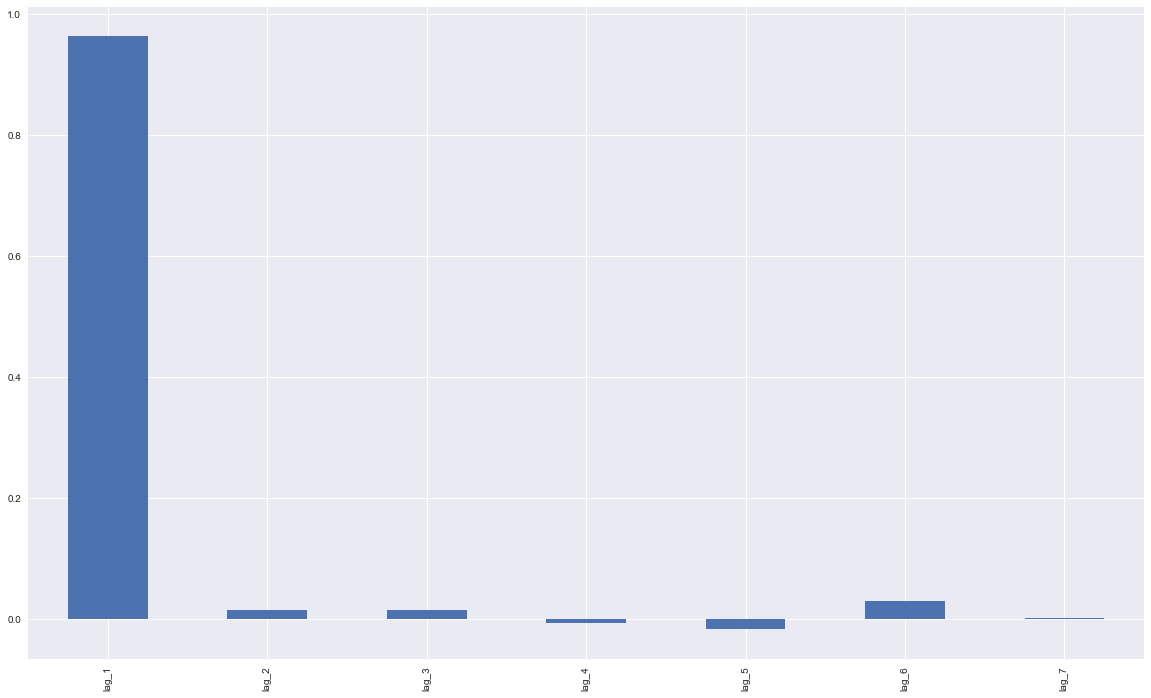

In [10]:
regd.mean().plot(kind='bar', figsize=(20, 12)) # .plot() take kind as kwarg for type of chart

In [11]:
dfs[sym].corr() # Lags are highly correlated with each other

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
GLD,1.0000,0.9972,0.9946,0.9920,0.9893,0.9867,0.9841,0.9815
lag_1,0.9972,1.0000,0.9972,0.9946,0.9920,0.9893,0.9867,0.9842
lag_2,0.9946,0.9972,1.0000,0.9972,0.9946,0.9920,0.9893,0.9867
lag_3,0.9920,0.9946,0.9972,1.0000,0.9972,0.9946,0.9920,0.9893
lag_4,0.9893,0.9920,0.9946,0.9972,1.0000,0.9972,0.9946,0.9920
lag_5,0.9867,0.9893,0.9920,0.9946,0.9972,1.0000,0.9972,0.9946
lag_6,0.9841,0.9867,0.9893,0.9920,0.9946,0.9972,1.0000,0.9972
lag_7,0.9815,0.9842,0.9867,0.9893,0.9920,0.9946,0.9972,1.0000


In [12]:
# Dickey Fuller test for stationarity of this data
from statsmodels.tsa.stattools import adfuller
adfuller(data[sym].dropna())

(-1.9488969577009931,
 0.3094193074034729,
 0,
 2515,
 {'1%': -3.4329527780962255,
  '5%': -2.8626898965523724,
  '10%': -2.567382133955709},
 8446.683102944744)

# Market Predictions from Returns Data
* Can we apply machine learning and deep learning to finance?
* Let's compare OLS to neural networks - we're looking for **statistical inefficiencies** in the data - rather than *economic inefficiencies*
* First, create lagged log returns

In [13]:
returns = np.log(data/data.shift(1))
returns.dropna(inplace=True)

In [14]:
dfs = {}
for sym in data:
    df, cols = add_lags(returns, sym, lags) # Lags on log returns here - so the 01/20 return is lag1 of 01/21
    mu, std = df[cols].mean(), df[cols].std()
    df[cols]= (df[cols] - mu)/ std # Gaussian normalization 
    dfs[sym] = df

In [15]:
dfs['AAPL.O'].head()

,AAPL.O,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2010-01-14,-0.0058,0.8050,-0.7587,-0.5999,0.3523,-0.1687,-1.0398,0.0519
2010-01-15,-0.0169,-0.4130,0.8053,-0.7584,-0.5997,0.3523,-0.1679,-1.0399
2010-01-19,0.0433,-1.0919,-0.4126,0.8055,-0.7583,-0.5996,0.3531,-0.1680
2010-01-20,-0.0155,2.6047,-1.0914,-0.4123,0.8060,-0.7582,-0.5988,0.3530
2010-01-21,-0.0174,-1.0109,2.6049,-1.0911,-0.4121,0.8060,-0.7574,-0.5989


In [16]:
adfuller(dfs[sym]['lag_1']) # Data is very not stationary

(-51.56825150582552,
 0.0,
 0,
 2507,
 {'1%': -3.4329610922579095,
  '5%': -2.8626935681060375,
  '10%': -2.567384088736619},
 7017.165474260225)

In [17]:
dfs[sym].corr() # Log returns are very low correlation

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
GLD,1.0000,-0.0297,0.0003,1.2635e-02,-0.0026,-5.9392e-03,0.0099,-0.0013
lag_1,-0.0297,1.0000,-0.0305,8.1418e-04,0.0128,-2.8765e-03,-0.0053,0.0098
lag_2,0.0003,-0.0305,1.0000,-3.1617e-02,0.0003,1.3234e-02,-0.0043,-0.0052
lag_3,0.0126,0.0008,-0.0316,1.0000e+00,-0.0313,-6.8542e-06,0.0141,-0.0044
lag_4,-0.0026,0.0128,0.0003,-3.1329e-02,1.0000,-3.1761e-02,0.0002,0.0141
lag_5,-0.0059,-0.0029,0.0132,-6.8542e-06,-0.0318,1.0000e+00,-0.0323,0.0002
lag_6,0.0099,-0.0053,-0.0043,1.4115e-02,0.0002,-3.2289e-02,1.0000,-0.0324
lag_7,-0.0013,0.0098,-0.0052,-4.3869e-03,0.0141,2.1707e-04,-0.0324,1.0000


In [18]:
from sklearn.metrics import accuracy_score
for sym in data:
    df = dfs[sym]
    reg = np.linalg.lstsq(df[cols], df[sym], rcond=-1)[0]
    pred = np.dot(df[cols], reg) # The dot product of the lag columns and the regression is the predicted value
    # Check the accuracy of regression-based
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred))
    print(f'OLS | {sym:10s} | acc={acc:.4f}')

OLS | AAPL.O     | acc=0.5056
OLS | MSFT.O     | acc=0.5088
OLS | INTC.O     | acc=0.5040
OLS | AMZN.O     | acc=0.5048
OLS | GS.N       | acc=0.5080
OLS | SPY        | acc=0.5080
OLS | .SPX       | acc=0.5167
OLS | .VIX       | acc=0.5291
OLS | EUR=       | acc=0.4984
OLS | XAU=       | acc=0.5207
OLS | GDX        | acc=0.5307
OLS | GLD        | acc=0.5072


# Neural Net Based Analysis
* For our first approach to neural net prediction vectors, let's train the whole sample - i.e. overfit to death

In [19]:
from sklearn.neural_network import MLPRegressor

for sym in data.columns:
    df = dfs[sym]
    model = MLPRegressor(hidden_layer_sizes=[512], # one layer with 512 nodes
                        random_state=100, # reproducability
                        max_iter = 1000, # stop before convergence if 1000 reached
                        early_stopping=True, # Stop early if loss is not improving
                        validation_fraction=0.15,
                        shuffle=False)
    model.fit(df[cols], df[sym]) # Fit this perceptron to the lagged data per symbol
    pred = model.predict(df[cols]) # Predict the values 
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred))
    print(f'Multi-Layer Perceptron | {sym:10s} | acc={acc:.4f}')

Multi-Layer Perceptron | AAPL.O     | acc=0.6005
Multi-Layer Perceptron | MSFT.O     | acc=0.5853
Multi-Layer Perceptron | INTC.O     | acc=0.5766
Multi-Layer Perceptron | AMZN.O     | acc=0.5510
Multi-Layer Perceptron | GS.N       | acc=0.6527
Multi-Layer Perceptron | SPY        | acc=0.5419
Multi-Layer Perceptron | .SPX       | acc=0.5399
Multi-Layer Perceptron | .VIX       | acc=0.6579
Multi-Layer Perceptron | EUR=       | acc=0.5642
Multi-Layer Perceptron | XAU=       | acc=0.5522
Multi-Layer Perceptron | GDX        | acc=0.6029
Multi-Layer Perceptron | GLD        | acc=0.5259


In [20]:
import tensorflow.compat.v1 as tf
from keras.layers import Dense
from keras.models import Sequential
tf.logging.set_verbosity('ERROR')


In [21]:
np.random.seed(100)
tf.set_random_seed(100)

In [22]:
def create_model(problem='regression'):
    model = Sequential()
    model.add(Dense(512, input_dim=len(cols),
                             activation='relu'))
    if problem == 'regression':
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer='adam') # Mean square error as loss function, adam stochastic optimizer
    else:
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam')
    return model
        

In [23]:
for sym in data.columns[:]:
    df = dfs[sym]
    model = create_model()
    model.fit(df[cols], df[sym], epochs=25, verbose=False)
    pred = model.predict(df[cols])
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred))
    print(f'DNN | {sym:10s} | acc={acc:4f}')

DNN | AAPL.O     | acc=0.608453
DNN | MSFT.O     | acc=0.615231
DNN | INTC.O     | acc=0.623604
DNN | AMZN.O     | acc=0.627592
DNN | GS.N       | acc=0.613636
DNN | SPY        | acc=0.559410
DNN | .SPX       | acc=0.547847
DNN | .VIX       | acc=0.614833
DNN | EUR=       | acc=0.581738
DNN | XAU=       | acc=0.602073
DNN | GDX        | acc=0.612041
DNN | GLD        | acc=0.600080


# Performance Out of Sample for OLS & NN
* The neural net trained on the full set shows significant statistical inefficiencies.
* Because of NN loss minimization, this architecture ovefits wildly.
* To get a more realistic read on performane of this measure, apply train-test-split
* Remember - this is all being fitted on log returns - i.e. do lagged returns predict future returns?

### OLS is roughly the same in/out of sample
### Multi-Layer Perceptron is way way worse
### Same thing for Sequential from Keras

In [43]:
split = int(len(dfs[sym]) * 0.8)

for sym in data.columns:
    df = dfs[sym]
#     print(df.head())
    train = df.iloc[:split]
    reg = np.linalg.lstsq(train[cols], train[sym], rcond=-1)[0] # Create fit vector on test set
    test = df.iloc[split:]
    pred = np.dot(test[cols], reg) # dot product of regression weights and lagged data to predict
#     print(reg)
#     print(pred[:2])
    acc = accuracy_score(np.sign(test[sym]), np.sign(pred))
    print(f'OLS | {sym:10s} | acc={acc:.4f}')

OLS | AAPL.O     | acc=0.5219
OLS | MSFT.O     | acc=0.4960
OLS | INTC.O     | acc=0.5418
OLS | AMZN.O     | acc=0.4841
OLS | GS.N       | acc=0.4980
OLS | SPY        | acc=0.5020
OLS | .SPX       | acc=0.5120
OLS | .VIX       | acc=0.5458
OLS | EUR=       | acc=0.4482
OLS | XAU=       | acc=0.5299
OLS | GDX        | acc=0.5159
OLS | GLD        | acc=0.5100


In [45]:
for sym in data.columns:
    df = dfs[sym]
    train = df.iloc[:split]
    model = MLPRegressor(hidden_layer_sizes=[512],
                        random_state=100,
                        max_iter=1000,
                        early_stopping=True,
                        validation_fraction=0.15,
                        shuffle=False)
    model.fit(train[cols], train[sym])
    test = df.iloc[split:]
    pred = model.predict(test[cols])
    acc = accuracy_score(np.sign(test[sym]), np.sign(pred))
    print(f'MLP | {sym:10s} | acc={acc:.4f}')

MLP | AAPL.O     | acc=0.4920
MLP | MSFT.O     | acc=0.5279
MLP | INTC.O     | acc=0.5279
MLP | AMZN.O     | acc=0.4641
MLP | GS.N       | acc=0.5040
MLP | SPY        | acc=0.5259
MLP | .SPX       | acc=0.5478
MLP | .VIX       | acc=0.5279
MLP | EUR=       | acc=0.4980
MLP | XAU=       | acc=0.5239
MLP | GDX        | acc=0.4880
MLP | GLD        | acc=0.5000


In [46]:
for sym in data.columns:
    df = dfs[sym]
    train = df.iloc[:split] # from everything to the split point - so 80% in this case
    model = create_model()
    model.fit(train[cols], train[sym], epochs=50, verbose=False)
    test = df.iloc[split:]
    pred = model.predict(test[cols])
    acc = accuracy_score(np.sign(test[sym]), np.sign(pred))
    print(f'DNN | {sym:10s} | acc={acc:.4f}')

DNN | AAPL.O     | acc=0.4522
DNN | MSFT.O     | acc=0.5040
DNN | INTC.O     | acc=0.4900
DNN | AMZN.O     | acc=0.5000
DNN | GS.N       | acc=0.5259
DNN | SPY        | acc=0.5398
DNN | .SPX       | acc=0.5339
DNN | .VIX       | acc=0.5020
DNN | EUR=       | acc=0.5060
DNN | XAU=       | acc=0.4861
DNN | GDX        | acc=0.4761
DNN | GLD        | acc=0.4880


# Improving Accuracy
* Two approaches two improve accuracy:
    1. Feature engineering - add additional features to the input vector that's learned on
    2. Increase data frequency - sample intraday

# Technical Indicators as Training Inputs
* Let's try creating simple moving average, rolling minimum, maximum, volality, and momentum

In [48]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'
data = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

In [50]:
def add_lags(data, ric, lags, window=50):
    cols = []
    df = pd.DataFrame(data[ric])
    df.dropna(inplace=True)
    df['r'] = np.log(df/df.shift())
    df['sma'] = df[ric].rolling(window).mean()
    df['min'] = df[ric].rolling(window).min()
    df['max'] = df[ric].rolling(window).max()
    df['mom'] = df['r'].rolling(window).mean() # Momentum is just the mean of returbns
    df['vol'] = df['r'].rolling(window).std()
    df.dropna(inplace=True) # Drop where window wasn't big enough
    df['d'] = np.where(df['r'] > 0, 1, 0)
    features = [ric, 'r', 'd', 'sma', 'min', 'max', 'mom', 'vol']
    for f in features:
        for lag in range(1, lags+1):
            col = f'{f}_lag_{lag}'
            df[col] = df[f].shift(lag)
            cols.append(col)
    df.dropna(inplace=True)
    return df, cols

In [51]:
lags = 5

In [52]:
dfs = {}
for ric in data:
    df, cols = add_lags(data, ric, lags)
    dfs[ric] = df.dropna(), cols

# Technical Indicators Added - Result
* In-Sample MLP has 5% hit-rate improvement
* In-sample Keras Sequential has 10% hit-rate improvement

In [54]:
from sklearn.neural_network import MLPClassifier
# Perceptron Approach
for ric in data:
    model = MLPClassifier(hidden_layer_sizes=[512],
                         random_state=100,
                         max_iter=1000,
                         early_stopping=True,
                         validation_fraction=0.15,
                         shuffle=False)
    df, cols = dfs[ric]
    df = (df - df.mean()) / df.std() # Normalize all features
    df['d'] = np.where(df['d'] > 0, 1, 0)
    model.fit(df[cols], df['d'])
    pred = model.predict(df[cols])
    acc = accuracy_score(df['d'], pred)
    print(f'IN-SAMPLE | {ric:7s} | acc={acc:.4f}')

IN-SAMPLE | AAPL.O  | acc=0.5510
IN-SAMPLE | MSFT.O  | acc=0.5376
IN-SAMPLE | INTC.O  | acc=0.5607
IN-SAMPLE | AMZN.O  | acc=0.5559
IN-SAMPLE | GS.N    | acc=0.5794
IN-SAMPLE | SPY     | acc=0.5729
IN-SAMPLE | .SPX    | acc=0.5941
IN-SAMPLE | .VIX    | acc=0.6940
IN-SAMPLE | EUR=    | acc=0.5766
IN-SAMPLE | XAU=    | acc=0.5672
IN-SAMPLE | GDX     | acc=0.5847
IN-SAMPLE | GLD     | acc=0.5567


In [56]:
%%time
# Keras version
for ric in data:
    model = create_model('classification')
    df, cols = dfs[ric]
    df = (df - df.mean()) / df.std() # Normalize
    df['d'] = np.where(df['d'] > 0, 1, 0) # Reset his after the normalization
    model.fit(df[cols], df['d'], epochs=50, verbose=False)
    pred = model.predict_classes(df[cols])
    acc = accuracy_score(df['d'], pred)
    print(f'IN-SAMPLE | {ric:7s} | acc={acc:.4f}')

IN-SAMPLE | AAPL.O  | acc=0.7013
IN-SAMPLE | MSFT.O  | acc=0.6916
IN-SAMPLE | INTC.O  | acc=0.7058
IN-SAMPLE | AMZN.O  | acc=0.6692
IN-SAMPLE | GS.N    | acc=0.6961
IN-SAMPLE | SPY     | acc=0.6883
IN-SAMPLE | .SPX    | acc=0.6948
IN-SAMPLE | .VIX    | acc=0.7375
IN-SAMPLE | EUR=    | acc=0.6741
IN-SAMPLE | XAU=    | acc=0.7001
IN-SAMPLE | GDX     | acc=0.6843
IN-SAMPLE | GLD     | acc=0.7054
CPU times: user 57 s, sys: 10.7 s, total: 1min 7s
Wall time: 36.6 s


# More Features
* Does this improve out of sample?
* Just a bit - but still not tradable

In [57]:
def train_test_model(model):
    for ric in data:
        df, cols = dfs[ric]
        split = int(len(df) * 0.85)
        train = df.iloc[:split].copy()
        mu, std = train[cols].mean(), train[cols].std()
        train[cols] = (train[cols]  - mu) / std # Normalize train set
        train['d'] = np.where(train['d'] > 0, 1, 0)
        model.fit(train[cols], train['d'])
        test = df.iloc[split:].copy()
        test[cols] = (test[cols] - mu) / std # Normalize test set
        test['d'] = np.where(test['d'] > 0, 1, 0)
        pred = model.predict(test[cols])
        acc = accuracy_score(test['d'], pred)
        print(f'OUT-OF-SAMPLE | {ric:7s} | acc={acc:.4f}')

In [58]:
model_mlp = MLPClassifier(hidden_layer_sizes=[512],
                         random_state=100,
                         max_iter=1000,
                         early_stopping=True,
                         validation_fraction=0.15,
                         shuffle=False)

In [59]:
%time train_test_model(model_mlp)

OUT-OF-SAMPLE | AAPL.O  | acc=0.4432
OUT-OF-SAMPLE | MSFT.O  | acc=0.4595
OUT-OF-SAMPLE | INTC.O  | acc=0.5000
OUT-OF-SAMPLE | AMZN.O  | acc=0.5270
OUT-OF-SAMPLE | GS.N    | acc=0.4838
OUT-OF-SAMPLE | SPY     | acc=0.4811
OUT-OF-SAMPLE | .SPX    | acc=0.5027
OUT-OF-SAMPLE | .VIX    | acc=0.5676
OUT-OF-SAMPLE | EUR=    | acc=0.4649
OUT-OF-SAMPLE | XAU=    | acc=0.5514
OUT-OF-SAMPLE | GDX     | acc=0.5162
OUT-OF-SAMPLE | GLD     | acc=0.4946
CPU times: user 6.9 s, sys: 531 ms, total: 7.43 s
Wall time: 3.99 s


# Bagging & Overfitting
* Bagging combines various trained models to form as a metamodel - this can fight overfitting

In [60]:
from sklearn.ensemble import BaggingClassifier

In [61]:
base_estimator = MLPClassifier(hidden_layer_sizes=[256],
                              random_state=100,
                              max_iter=1000,
                              early_stopping=True,
                              validation_fraction=0.15,
                              shuffle=False)

In [62]:
model_bag = BaggingClassifier(base_estimator=base_estimator,
                             n_estimators=35,
                             max_samples=0.25, # Max % of training data avilable per estimator
                             max_features=0.5, # Max  % of features to pull per estimator
                             bootstrap=False, # Data with replacement?
                             bootstrap_features=True, # Features with replacement?
                             n_jobs=8, # Number of models training in parallel
                             random_state=100)

In [63]:
%time train_test_model(model_bag)

OUT-OF-SAMPLE | AAPL.O  | acc=0.5243
OUT-OF-SAMPLE | MSFT.O  | acc=0.5703
OUT-OF-SAMPLE | INTC.O  | acc=0.5027
OUT-OF-SAMPLE | AMZN.O  | acc=0.5270
OUT-OF-SAMPLE | GS.N    | acc=0.5243
OUT-OF-SAMPLE | SPY     | acc=0.5595
OUT-OF-SAMPLE | .SPX    | acc=0.5514
OUT-OF-SAMPLE | .VIX    | acc=0.5649
OUT-OF-SAMPLE | EUR=    | acc=0.5108
OUT-OF-SAMPLE | XAU=    | acc=0.5378
OUT-OF-SAMPLE | GDX     | acc=0.5162
OUT-OF-SAMPLE | GLD     | acc=0.5432
CPU times: user 1.85 s, sys: 330 ms, total: 2.18 s
Wall time: 14.1 s


# Intraday Predictions
* Is there more statisical inefficiencies that allow for Alpha intraday?

In [64]:
url = 'http://hilpisch.com/aiif_eikon_id_data.csv'

In [65]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5529 entries, 2019-03-01 00:00:00 to 2020-01-01 00:00:00
Data columns (total 12 columns):
AAPL.O    3384 non-null float64
MSFT.O    3378 non-null float64
INTC.O    3275 non-null float64
AMZN.O    3381 non-null float64
GS.N      1686 non-null float64
SPY       3388 non-null float64
.SPX      1802 non-null float64
.VIX      2959 non-null float64
EUR=      5429 non-null float64
XAU=      5149 non-null float64
GDX       3173 non-null float64
GLD       3351 non-null float64
dtypes: float64(12)
memory usage: 561.5 KB


In [67]:
lags = 5

In [68]:
dfs = {}
for ric in data:
    df, cols = add_lags(data, ric, lags)
    dfs[ric] = df, cols

In [69]:
%time train_test_model(model_mlp)

OUT-OF-SAMPLE | AAPL.O  | acc=0.5420
OUT-OF-SAMPLE | MSFT.O  | acc=0.4930
OUT-OF-SAMPLE | INTC.O  | acc=0.5549
OUT-OF-SAMPLE | AMZN.O  | acc=0.4709
OUT-OF-SAMPLE | GS.N    | acc=0.5184
OUT-OF-SAMPLE | SPY     | acc=0.4860
OUT-OF-SAMPLE | .SPX    | acc=0.5019
OUT-OF-SAMPLE | .VIX    | acc=0.4885
OUT-OF-SAMPLE | EUR=    | acc=0.5130
OUT-OF-SAMPLE | XAU=    | acc=0.4824
OUT-OF-SAMPLE | GDX     | acc=0.4765
OUT-OF-SAMPLE | GLD     | acc=0.5455
CPU times: user 9.33 s, sys: 745 ms, total: 10.1 s
Wall time: 5.19 s


In [70]:
%time train_test_model(model_bag)

OUT-OF-SAMPLE | AAPL.O  | acc=0.5660
OUT-OF-SAMPLE | MSFT.O  | acc=0.5431
OUT-OF-SAMPLE | INTC.O  | acc=0.5072
OUT-OF-SAMPLE | AMZN.O  | acc=0.5110
OUT-OF-SAMPLE | GS.N    | acc=0.5020
OUT-OF-SAMPLE | SPY     | acc=0.5120
OUT-OF-SAMPLE | .SPX    | acc=0.4677
OUT-OF-SAMPLE | .VIX    | acc=0.5092
OUT-OF-SAMPLE | EUR=    | acc=0.5242
OUT-OF-SAMPLE | XAU=    | acc=0.5255
OUT-OF-SAMPLE | GDX     | acc=0.5085
OUT-OF-SAMPLE | GLD     | acc=0.5374
CPU times: user 1.86 s, sys: 329 ms, total: 2.19 s
Wall time: 17.3 s
